In [57]:
import pandas as pd 
import numpy as np
import xgboost as xgb

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score,roc_auc_score,make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [3]:
df=pd.read_excel('Telco_customer_churn.xlsx')

In [4]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [5]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [6]:
df.drop(['Churn Label','Churn Score','CLTV','Churn Reason'],inplace=True,axis=1)

In [7]:
df['Country'].unique()

array(['United States'], dtype=object)

In [8]:
df['Count'].unique()

array([1], dtype=int64)

In [9]:
df['State'].unique()

array(['California'], dtype=object)

In [10]:
df['City'].unique()

array(['Los Angeles', 'Beverly Hills', 'Huntington Park', ..., 'Standish',
       'Tulelake', 'Olympic Valley'], dtype=object)

In [11]:
df.drop(['CustomerID','Count','Country','State','Lat Long'],inplace=True,axis=1)

In [12]:
df['City'].replace(' ','_',regex=True,inplace=True)
df.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [13]:
df.columns=df.columns.str.replace(' ','_',regex=True)
df.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [14]:
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn_Value            int64
dtype: object

In [15]:
df.isin([' ', np.nan, None,'NaN']).sum()

City                  0
Zip_Code              0
Latitude              0
Longitude             0
Gender                0
Senior_Citizen        0
Partner               0
Dependents            0
Tenure_Months         0
Phone_Service         0
Multiple_Lines        0
Internet_Service      0
Online_Security       0
Online_Backup         0
Device_Protection     0
Tech_Support          0
Streaming_TV          0
Streaming_Movies      0
Contract              0
Paperless_Billing     0
Payment_Method        0
Monthly_Charges       0
Total_Charges        11
Churn_Value           0
dtype: int64

In [16]:
len(df.loc[df['Total_Charges']==' '])

11

In [17]:
df.loc[(df['Total_Charges']==' '),'Total_Charges']=0

In [18]:
df.loc[df['Tenure_Months']==0]

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,0


In [19]:
df['Total_Charges']=pd.to_numeric(df['Total_Charges'])

In [20]:
df.replace(' ','_',regex=True,inplace=True)

In [21]:
X=df.drop('Churn_Value',axis=1).copy()
X.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30


In [22]:
y=df['Churn_Value'].copy()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn_Value, dtype: int64

In [23]:
X.select_dtypes(include=['object',]).columns

Index(['City', 'Gender', 'Senior_Citizen', 'Partner', 'Dependents',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service',
       'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support',
       'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paperless_Billing',
       'Payment_Method'],
      dtype='object')

In [24]:
X_encoded=pd.get_dummies(X,columns=['City', 'Gender', 'Senior_Citizen', 'Partner', 'Dependents',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service',
       'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support',
       'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paperless_Billing',
       'Payment_Method'] )
X_encoded.head()                    

,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,City_Acampo,City_Acton,City_Adelanto,City_Adin,...,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,90003,33.964131,-118.272783,2,53.85,108.15,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,90005,34.059281,-118.307420,2,70.70,151.65,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,90006,34.048013,-118.293953,8,99.65,820.50,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,90010,34.062125,-118.315709,28,104.80,3046.05,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
4,90015,34.039224,-118.266293,49,103.70,5036.30,0,0,0,0,...,1,1,0,0,0,1,1,0,0,0


In [25]:
y.unique()

array([1, 0], dtype=int64)

In [26]:
sum(y)/len(y)

0.2653698707936959

In [27]:
X_train,X_test,y_train,y_test= train_test_split(X_encoded,y,random_state=42,stratify=y)

In [28]:
sum(y_train)/len(y_train)

0.2654297614539947

In [29]:
sum(y_test)/len(y_test)

0.26519023282226006

In [30]:
X.eq(' ').any()

City                 False
Zip_Code             False
Latitude             False
Longitude            False
Gender               False
Senior_Citizen       False
Partner              False
Dependents           False
Tenure_Months        False
Phone_Service        False
Multiple_Lines       False
Internet_Service     False
Online_Security      False
Online_Backup        False
Device_Protection    False
Tech_Support         False
Streaming_TV         False
Streaming_Movies     False
Contract             False
Paperless_Billing    False
Payment_Method       False
Monthly_Charges      False
Total_Charges        False
dtype: bool

In [31]:
clf_xgb=xgb.XGBClassifier(objective='binary:logistic',missing=np.nan,seed=42)
clf_xgb.fit(X_train,
            y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_test,y_test)])

c:\Users\enesm\OneDrive\Masaüstü\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\enesm\OneDrive\Masaüstü\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-aucpr:0.64036
[1]	validation_0-aucpr:0.64404
[2]	validation_0-aucpr:0.65124
[3]	validation_0-aucpr:0.65052
[4]	validation_0-aucpr:0.65321
[5]	validation_0-aucpr:0.64854
[6]	validation_0-aucpr:0.65459
[7]	validation_0-aucpr:0.65895
[8]	validation_0-aucpr:0.65746
[9]	validation_0-aucpr:0.65850
[10]	validation_0-aucpr:0.66217
[11]	validation_0-aucpr:0.66527
[12]	validation_0-aucpr:0.66322
[13]	validation_0-aucpr:0.66310
[14]	validation_0-aucpr:0.66000
[15]	validation_0-aucpr:0.66027
[16]	validation_0-aucpr:0.65781
[17]	validation_0-aucpr:0.65593
[18]	validation_0-aucpr:0.65738
[19]	validation_0-aucpr:0.65829
[20]	validation_0-aucpr:0.65683


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

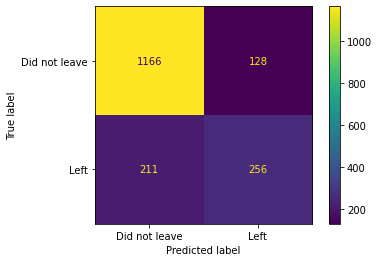

In [32]:
plot_confusion_matrix(clf_xgb,
                      X_test,
                      y_test,
                      values_format='d',
                      display_labels=['Did not leave','Left'])

In [34]:
grid_params={'max_depth':[3,4,5],
             'learning_rate':[0.1,0.01,0.05],
             'gamma':[0,0.25,1],
             'reg_lambda':[0,1,10],
             'scale_pos_weight':[1,3,5],
             }

In [35]:
len(y_train.loc[y_train==0])/len(y_train.loc[y_train==1])

2.767475035663338

In [36]:
optimal_params=GridSearchCV(xgb.XGBClassifier(objective='binary:logistic',
                                              seed=42,
                                              subsample=0.9,
                                              colsample_bytree=0.5),
grid_params,scoring='roc_auc',verbose=2,n_jobs=8,cv=3
)
optimal_params.fit(X_train,
            y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_test,y_test)])

Fitting 3 folds for each of 243 candidates, totalling 729 fits


c:\Users\enesm\OneDrive\Masaüstü\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\enesm\OneDrive\Masaüstü\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-aucpr:0.60495
[1]	validation_0-aucpr:0.61469
[2]	validation_0-aucpr:0.63807
[3]	validation_0-aucpr:0.63873
[4]	validation_0-aucpr:0.64356
[5]	validation_0-aucpr:0.64515
[6]	validation_0-aucpr:0.64181
[7]	validation_0-aucpr:0.63766
[8]	validation_0-aucpr:0.63984
[9]	validation_0-aucpr:0.64285
[10]	validation_0-aucpr:0.64724
[11]	validation_0-aucpr:0.64847
[12]	validation_0-aucpr:0.64796
[13]	validation_0-aucpr:0.64946
[14]	validation_0-aucpr:0.65172
[15]	validation_0-aucpr:0.65345
[16]	validation_0-aucpr:0.65394
[17]	validation_0-aucpr:0.64935
[18]	validation_0-aucpr:0.65086
[19]	validation_0-aucpr:0.65486
[20]	validation_0-aucpr:0.65414
[21]	validation_0-aucpr:0.65607
[22]	validation_0-aucpr:0.65450
[23]	validation_0-aucpr:0.65551
[24]	validation_0-aucpr:0.65563
[25]	validation_0-aucpr:0.65700
[26]	validation_0-aucpr:0.65737
[27]	validation_0-aucpr:0.65876
[28]	validation_0-aucpr:0.65938
[29]	validation_0-aucpr:0.66123
[30]	validation_0-aucpr:0.66165
[31]	validation_0-

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [37]:
optimal_params.best_params_

{'gamma': 0.25,
 'learning_rate': 0.1,
 'max_depth': 4,
 'reg_lambda': 10,
 'scale_pos_weight': 1}

In [38]:
grid_params={'max_depth':[4],
             'learning_rate':[0.1,0.2,0.5,1],
             'gamma':[0.25],
             'reg_lambda':[10,15,20,50],
             'scale_pos_weight':[0.01,0.5,1]}

In [39]:
optimal_params=GridSearchCV(xgb.XGBClassifier(objective='binary:logistic',
                                              seed=42,
                                              subsample=0.9,
                                              colsample_bytree=0.5),
grid_params,scoring='roc_auc',verbose=2,n_jobs=8,cv=3
)
optimal_params.fit(X_train,
            y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_test,y_test)])

Fitting 3 folds for each of 48 candidates, totalling 144 fits


c:\Users\enesm\OneDrive\Masaüstü\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\enesm\OneDrive\Masaüstü\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-aucpr:0.60495
[1]	validation_0-aucpr:0.61469
[2]	validation_0-aucpr:0.63807
[3]	validation_0-aucpr:0.63873
[4]	validation_0-aucpr:0.64356
[5]	validation_0-aucpr:0.64515
[6]	validation_0-aucpr:0.64181
[7]	validation_0-aucpr:0.63766
[8]	validation_0-aucpr:0.63984
[9]	validation_0-aucpr:0.64285
[10]	validation_0-aucpr:0.64724
[11]	validation_0-aucpr:0.64847
[12]	validation_0-aucpr:0.64796
[13]	validation_0-aucpr:0.64946
[14]	validation_0-aucpr:0.65172
[15]	validation_0-aucpr:0.65345
[16]	validation_0-aucpr:0.65394
[17]	validation_0-aucpr:0.64935
[18]	validation_0-aucpr:0.65086
[19]	validation_0-aucpr:0.65486
[20]	validation_0-aucpr:0.65414
[21]	validation_0-aucpr:0.65607
[22]	validation_0-aucpr:0.65450
[23]	validation_0-aucpr:0.65551
[24]	validation_0-aucpr:0.65563
[25]	validation_0-aucpr:0.65700
[26]	validation_0-aucpr:0.65737
[27]	validation_0-aucpr:0.65876
[28]	validation_0-aucpr:0.65938
[29]	validation_0-aucpr:0.66123
[30]	validation_0-aucpr:0.66165
[31]	validation_0-

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [43]:
optimal_params.best_params_

{'gamma': 0.25,
 'learning_rate': 0.1,
 'max_depth': 4,
 'reg_lambda': 10,
 'scale_pos_weight': 1}

In [50]:
Model1.best_params_

{'gamma': 0.25,
 'learning_rate': 0.05,
 'max_depth': 4,
 'reg_lambda': 5,
 'scale_pos_weight': 1}

# Building Tree

In [52]:
clf_xgb=xgb.XGBClassifier(seed=42,
                          objective='binary:logistic',
                          gamma=0.25,
                          learning_rate=0.1,
                          max_depth=4,
                          reg_lambda=5,
                          scale_pos_weight=4,
                          subsample=0.9,
                          colsample_bytree=0.5)

In [53]:
clf_xgb.fit(X_train,
            y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_test,y_test)])

c:\Users\enesm\OneDrive\Masaüstü\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\enesm\OneDrive\Masaüstü\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-aucpr:0.57332
[1]	validation_0-aucpr:0.57922
[2]	validation_0-aucpr:0.61352
[3]	validation_0-aucpr:0.62202
[4]	validation_0-aucpr:0.62840
[5]	validation_0-aucpr:0.62785
[6]	validation_0-aucpr:0.62679
[7]	validation_0-aucpr:0.62530
[8]	validation_0-aucpr:0.62777
[9]	validation_0-aucpr:0.63138
[10]	validation_0-aucpr:0.63278
[11]	validation_0-aucpr:0.64881
[12]	validation_0-aucpr:0.65043
[13]	validation_0-aucpr:0.65032
[14]	validation_0-aucpr:0.64480
[15]	validation_0-aucpr:0.64644
[16]	validation_0-aucpr:0.64397
[17]	validation_0-aucpr:0.64237
[18]	validation_0-aucpr:0.64130
[19]	validation_0-aucpr:0.64710
[20]	validation_0-aucpr:0.64740
[21]	validation_0-aucpr:0.64946


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.25, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

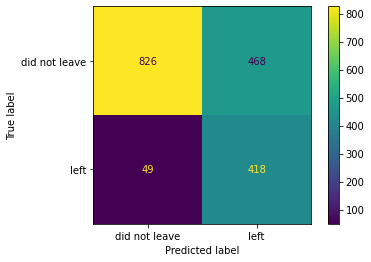

In [54]:
plot_confusion_matrix(clf_xgb,X_test,y_test,values_format='d',display_labels=['did not leave','left'])

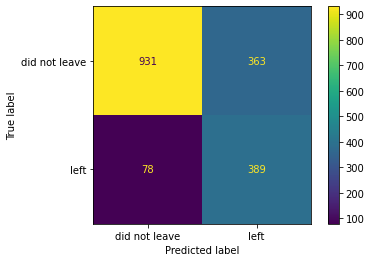

In [57]:
plot_confusion_matrix(clf_xgb,X_test,y_test,values_format='d',display_labels=['did not leave','left'])

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
forest=RandomForestClassifier()

In [60]:
forest.fit(X_train,y_train)

RandomForestClassifier()

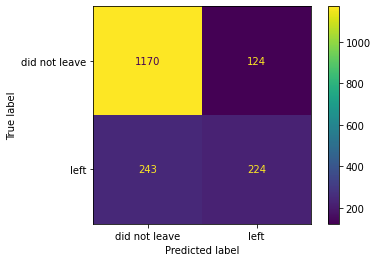

In [78]:
plot_confusion_matrix(forest,X_test,y_test,values_format='d',display_labels=['did not leave','left'])

In [55]:
bst=clf_xgb.get_booster()
for importance_type in ('weight','gain','cover','total_gain','total_cover'):
    print('%s: ' % importance_type,bst.get_score)

node_params={'shape':'box',
             'style':'filled,rounded',
             'fillcolor':'#78cbe'}
leaf_params={'shape':'box',
             'style':'filled',
             'fillcolor':'#e48038'}

weight:  <bound method Booster.get_score of <xgboost.core.Booster object at 0x00000249E43ED220>>
gain:  <bound method Booster.get_score of <xgboost.core.Booster object at 0x00000249E43ED220>>
cover:  <bound method Booster.get_score of <xgboost.core.Booster object at 0x00000249E43ED220>>
total_gain:  <bound method Booster.get_score of <xgboost.core.Booster object at 0x00000249E43ED220>>
total_cover:  <bound method Booster.get_score of <xgboost.core.Booster object at 0x00000249E43ED220>>


In [ ]:
xgb.to_graphviz(clf_xgb,num_trees=0,size='10,10',
                condition_node_params=node_params,
                leaf_node_params=leaf_params)